Import necessary pyhton libraries

In [2]:
import pandas as pd
import numpy as np

Read CSV File

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/austin1018/IS362_Assignment8/main/auto-mpg.data", header=None,sep="\t")

Change the column names and fix some of the data issue

In [4]:
df["mpg"]=df.iloc[:, 0].str.slice(0, 6)
df["cylinders"]=df.iloc[:, 0].str.slice(7, 11)
df["displacement"]=df.iloc[:, 0].str.slice(11, 22)
df["horsepower"]=df.iloc[:, 0].str.slice(22, 33)
df["weight"]=df.iloc[:, 0].str.slice(33, 44).replace(".","")
df["acceleration"]=df.iloc[:, 0].str.slice(44, 51)
df["model year"]=df.iloc[:, 0].str.slice(51, 55)
df["origin"]=df.iloc[:, 0].str[55:]
df["weight"]=df["weight"].str.replace(".","")
df["horsepower"]=df["horsepower"].replace("?          ",np.NaN)
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["car name"]=df.iloc[:, 1]
df.drop(df.columns[[0,1]],axis=1,inplace=True)

<ipython-input-4-3033fc98e693>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["weight"]=df["weight"].str.replace(".","")


Replace 1,2,3 with USA, Asia and Europe

In [5]:
df["origin"]=df["origin"].str.replace("1","USA").replace("2","Asia").replace("3","Europe")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,USA,ford mustang gl
394,44.0,4,97.00,52.0,2130,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,USA,ford ranger


Show the distribution for cylinders

In [6]:
df["cylinders"]=df["cylinders"].astype(int)
DF_Agg=df.groupby('cylinders')['origin'].count()
DF_Agg

cylinders
3      4
4    204
5      3
6     84
8    103
Name: origin, dtype: int64

<AxesSubplot:xlabel='cylinders'>

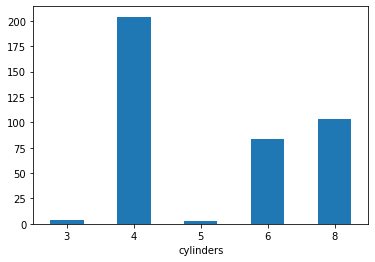

In [7]:
bdf=DF_Agg.plot.bar(x='cylinders', y='count', rot=0)
bdf

Show the relationship between horsepower and weight

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

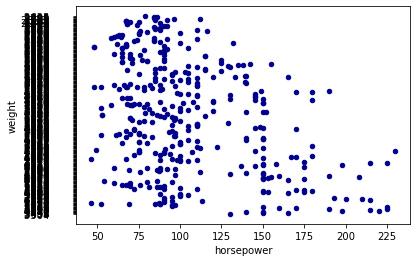

In [8]:
ax1 = df.plot.scatter(x='horsepower',y='weight',c='DarkBlue')
ax1

Show the distribution for origin

In [9]:
DF_Agg=df.groupby('origin')['mpg'].count()
DF_Agg

origin
Asia       70
Europe     79
USA       249
Name: mpg, dtype: int64

<AxesSubplot:xlabel='origin'>

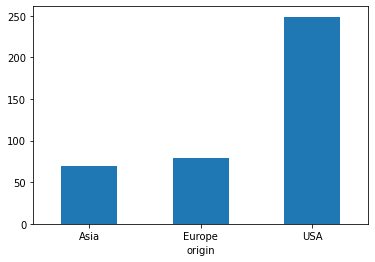

In [10]:
bdf=DF_Agg.plot.bar(x='origin', y='count', rot=0)
bdf